In [229]:
from __future__ import absolute_import, division, print_function, unicode_literals

import glob
import math
import os
import tempfile

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pk
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.data import Dataset
import pathlib
import sklearn
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers
import matplotlib as mpl
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

In [267]:
# Import the dataset with pandas
data = pd.read_csv("fullfeature.csv")
data.head()

,fire_lat,fire_long,acq_hour,satellite,instrument,acq_daynight,subcell_id,fire_0d,township,date,...,fire_2d,fire_3d,subcell_fire_lat,subcell_fire_long,pheno1_long_dist,group1_size_dbef,reactivation,pheno2_close_dist,touched_phenom1,day_numb
0,0.0,0.0,0,0,0,0,T083R01_00,0,T083R01,02/05/2016,...,0,0,0.0,0.0,0,0.0,0,0,0,1
1,0.0,0.0,0,0,0,0,T083R01_01,0,T083R01,02/05/2016,...,0,0,0.0,0.0,0,0.0,0,0,0,1
2,0.0,0.0,0,0,0,0,T083R01_02,0,T083R01,02/05/2016,...,0,0,0.0,0.0,0,0.0,0,0,0,1
3,0.0,0.0,0,0,0,0,T083R01_03,0,T083R01,02/05/2016,...,0,0,0.0,0.0,0,0.0,0,0,0,1
4,0.0,0.0,0,0,0,0,T083R01_04,0,T083R01,02/05/2016,...,0,0,0.0,0.0,0,0.0,0,0,0,1


In [268]:
# Filter the days when there is no fire observation

list_days_out = ["26/05/2016", "27/05/2016","28/05/2016","29/05/2016",
                 "30/05/2016","31/05/2016", "01/06/2016", "02/06/2016"
                ]
data = data[~data.date.isin(list_days_out)]
data.shape

(115500, 41)

In [269]:
############################# Reset all index ##########################
data = data.sort_index(ascending=[True])
data = data.reset_index(drop = True)

In [270]:
# Create two separate dataset for day two and day three

data_two = data.drop(["convdate", "date", "row", "column", "township", "satellite", "instrument",
                 "acq_daynight", "acq_hour", "subcell_id", "subcell_bound_up_long", "subcell_bound_down_long",
                 "subcell_bound_up_lat", "subcell_bound_down_lat", "cell_bound_up_long", "cell_bound_down_long",
                 "cell_bound_up_lat", "cell_bound_down_lat", "fire_long", "fire_lat", "group1_size_dbef",
                 "touched_phenom1", "subcell_fire_long", "subcell_fire_lat", "day_numb", "fire_1d", "fire_3d"],
                 axis = 1
                )
data_three = data.drop(["convdate", "date", "row", "column", "township", "satellite", "instrument",
                 "acq_daynight", "acq_hour", "subcell_id", "subcell_bound_up_long", "subcell_bound_down_long",
                 "subcell_bound_up_lat", "subcell_bound_down_lat", "cell_bound_up_long", "cell_bound_down_long",
                 "cell_bound_up_lat", "cell_bound_down_lat", "fire_long", "fire_lat", "group1_size_dbef",
                 "touched_phenom1", "subcell_fire_long", "subcell_fire_lat", "day_numb", "fire_1d", "fire_2d"],
                 axis = 1
                )
#data_two.info()

In [271]:
mpl.rcParams['figure.figsize'] = (8, 6)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

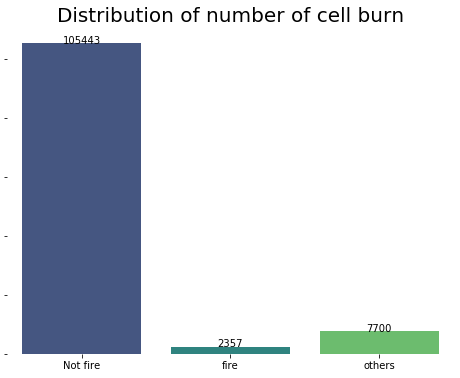

In [272]:
# using seaborns countplot to show distribution of classes in dataset

fig, ax = plt.subplots()
g = sns.countplot(data_two.fire_2d, palette = "viridis")
g.set_xticklabels(["Not fire", "fire", "others"])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = "{:.0f}".format(p.get_height())
            ax.text(_x, _y, value, ha = "center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title("Distribution of number of cell burn", fontsize = 20)
plt.tick_params(axis = "x", which = "major", labelsize = 10)
plt.show()

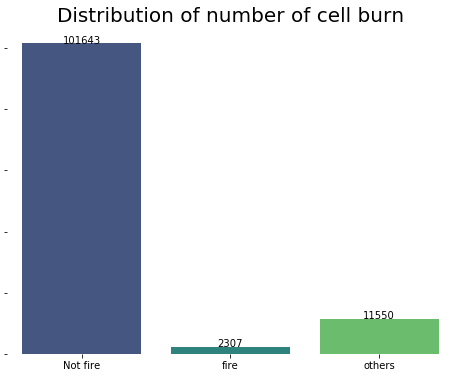

In [273]:
# using seaborns countplot to show distribution of classes in dataset

fig, ax = plt.subplots()
g = sns.countplot(data_three.fire_3d, palette = "viridis")
g.set_xticklabels(["Not fire", "fire", "others"])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = "{:.0f}".format(p.get_height())
            ax.text(_x, _y, value, ha = "center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title("Distribution of number of cell burn", fontsize = 20)
plt.tick_params(axis = "x", which = "major", labelsize = 10)
plt.show()

In [274]:
# Delete all observations with a class of 99

data_two = data_two[data_two["fire_2d"]!=99]
data_three = data_three[data_three["fire_3d"]!=99]
print("Number of 99 on day two : ",len(data_two[data_two["fire_2d"] == 99]))
print("Number of 99 on day three : ",len(data_three[data_three["fire_3d"] == 99]))

Number of 99 on day two :  0
Number of 99 on day three :  0


In [275]:
#print(data_two["fire_2d"].value_counts())
#print(data_three["fire_3d"].value_counts())

In [276]:
# Examine the class label imbalance
# Let's look at the dataset imbalance:

############################# Day two ##############################
not_fire_two, fire_two = np.bincount(data_two["fire_2d"])
total_two = not_fire_two + fire_two

############################# Day three ############################
not_fire_three, fire_three = np.bincount(data_three["fire_3d"])
total_three = not_fire_three + fire_three

print('Examples:\n    Total_two: {}\n    Positive: {} ({:.2f}% of total day two)\n'.format(
    total_two, fire_two, 100 * fire_two / total_two))
print('Examples:\n    Total_three: {}\n    Positive: {} ({:.2f}% of total day three)\n'.format(
    total_three, fire_three, 100 * fire_three / total_three))

Examples:
    Total_two: 107800
    Positive: 2357 (2.19% of total day two)

Examples:
    Total_three: 103950
    Positive: 2307 (2.22% of total day three)



In [277]:
# Split train, validation & test size for both dataset

data_two_inf = 22*3850
data_three_inf = 21*3850
data_val_two_inf = 18*3850
data_val_three_inf = 17*3850
data_two_sup = 22*3850 + 6*3850
data_three_sup = 21*3850 + 6*3850

########################### Define columns of day two ################################
col_day_two = ["fire_0d", "air_min_temp(°C)", "air_max_temp(°C)", "precipit(mm)",
          "precipit_accumul(mm)", "avg_humidity(%)", "computed_incoming_rad(MJ/m2)",
          "elevation(m)", "interpol_wind_direct(°)", "aggreg_wind_veloc(km/h)",
          "reactivation", "pheno2_close_dist", "pheno1_long_dist", "fire_2d"
         ]

########################### Define columns of day three ###############################
col_day_three = ["fire_0d", "air_min_temp(°C)", "air_max_temp(°C)", "precipit(mm)",
          "precipit_accumul(mm)", "avg_humidity(%)", "computed_incoming_rad(MJ/m2)",
          "elevation(m)", "interpol_wind_direct(°)", "aggreg_wind_veloc(km/h)",
          "reactivation", "pheno2_close_dist", "pheno1_long_dist", "fire_3d"
         ]

########################## Train, val & test set of day two ###########################
train_2d = data_two.loc[:(data_two_inf-1), col_day_two]
train_val_two = data_two.loc[data_val_two_inf:(data_two_inf-1), col_day_two]
test_2d = data_two.loc[data_two_inf:(data_two_sup-1), col_day_two]

########################## Train, val & test set of day three #########################
train_3d = data_three.loc[:(data_three_inf-1), col_day_three]
train_val_three = data_three.loc[data_val_three_inf:(data_three_inf-1), col_day_three]
test_3d = data_three.loc[data_three_inf:(data_three_sup-1), col_day_three]

In [278]:
################################### Reset all index ###################################

train_2d = train_2d.sort_index(ascending = [True])
train_val_two = train_val_two.sort_index(ascending = [True])
test_2d = test_2d.sort_index(ascending = [True])

train_3d = train_3d.sort_index(ascending = [True])
train_val_three = train_val_three.sort_index(ascending = [True])
test_3d = test_3d.sort_index(ascending = [True])

train_2d = train_2d.reset_index(drop = True)
train_val_two = train_val_two.reset_index(drop = True)
test_2d = test_2d.reset_index(drop = True)

train_3d = train_3d.reset_index(drop = True)
train_val_three = train_val_three.reset_index(drop = True)
test_3d = test_3d.reset_index(drop = True)

In [279]:
print(train_2d.shape, train_val_two.shape, test_2d.shape)
print(train_3d.shape, train_val_three.shape, test_3d.shape)

(84700, 14) (15400, 14) (23100, 14)
(80850, 14) (15400, 14) (23100, 14)


In [280]:
##################### Separe categorical and numerical variables ######################

###################### Define train numerical dataset for labels ######################
X_train_num_2d = train_2d.drop(["fire_0d", "fire_2d", "pheno1_long_dist", "pheno2_close_dist",
                               "reactivation"], axis = 1)
X_train_val2_num = train_val_two.drop(["fire_0d", "fire_2d", "pheno1_long_dist", "pheno2_close_dist",
                               "reactivation"], axis = 1)
X_train_num_3d = train_3d.drop(["fire_0d", "fire_3d", "pheno1_long_dist", "pheno2_close_dist",
                               "reactivation"], axis = 1)
X_train_val3_num = train_val_three.drop(["fire_0d", "fire_3d", "pheno1_long_dist", "pheno2_close_dist",
                               "reactivation"], axis = 1)

###################### Define train categorical dataset for labels ####################
X_train_cat_2d = train_2d[["fire_0d", "fire_2d", "pheno1_long_dist", "pheno2_close_dist", "reactivation"]]
X_train_val2_cat = train_val_two[["fire_0d", "fire_2d", "pheno1_long_dist", "pheno2_close_dist", "reactivation"]]

X_train_cat_3d = train_3d[["fire_0d", "fire_3d", "pheno1_long_dist", "pheno2_close_dist", "reactivation"]]
X_train_val3_cat = train_val_three[["fire_0d", "fire_3d", "pheno1_long_dist", "pheno2_close_dist", "reactivation"]]

####################### Define test numerical dataset for labels ######################
X_test_num_2d = test_2d.drop(["fire_0d", "fire_2d", "pheno1_long_dist", "pheno2_close_dist",
                              "reactivation"], axis = 1)
X_test_num_3d = test_3d.drop(["fire_0d", "fire_3d", "pheno1_long_dist", "pheno2_close_dist",
                              "reactivation"], axis = 1)

####################### Define test categorical dataset for labels ####################
X_test_cat_2d = test_2d[["fire_0d", "fire_2d", "pheno1_long_dist", "pheno2_close_dist", "reactivation"]]
X_test_cat_3d = test_3d[["fire_0d", "fire_3d", "pheno1_long_dist", "pheno2_close_dist", "reactivation"]]

In [281]:
######################## Create np arrays of labels and features ######################

train_two_labels = np.array(train_2d.pop("fire_2d"))
bool2_train_labels = train_two_labels != 0
val2_labels = np.array(train_val_two.pop("fire_2d"))
test_two_labels = np.array(test_2d.pop("fire_2d"))

train_three_labels = np.array(train_3d.pop("fire_3d"))
bool3_train_labels = train_three_labels != 0
val3_labels = np.array(train_val_three.pop("fire_3d"))
test_three_labels = np.array(test_3d.pop("fire_3d"))

################## Drop cat variables from train, val and test set ####################

popped_train_two = train_2d.drop(["fire_0d", "pheno1_long_dist", "pheno2_close_dist", "reactivation"], axis = 1)
popped_val_two = train_val_two.drop(["fire_0d", "pheno1_long_dist", "pheno2_close_dist", "reactivation"], axis = 1)
popped_test_two = test_2d.drop(["fire_0d", "pheno1_long_dist", "pheno2_close_dist", "reactivation"], axis = 1)

popped_train_three = train_3d.drop(["fire_0d", "pheno1_long_dist", "pheno2_close_dist", "reactivation"], axis = 1)
popped_val_three = train_val_three.drop(["fire_0d", "pheno1_long_dist", "pheno2_close_dist", "reactivation"], axis = 1)
popped_test_three = test_3d.drop(["fire_0d", "pheno1_long_dist", "pheno2_close_dist", "reactivation"], axis = 1)

######################### Features that we are going to fit ###########################
train_two_features = np.array(popped_train_two)
val_two_features = np.array(popped_val_two)
test_two_features = np.array(popped_test_two)

train_three_features = np.array(popped_train_three)
val_three_features = np.array(popped_val_three)
test_three_features = np.array(popped_test_three)

In [282]:
train_three_features.shape, train_two_features.shape, val_three_features.shape, train_two_labels.shape

((80850, 9), (84700, 9), (15400, 9), (84700,))

Normalize the input features using the sklearn StandardScaler. This will set the mean to 0 and standard deviation to 1.

Note : The StandardScaler is only fit using the train_features to be sure the model is not peeking at the validation or test sets.

In [283]:
sc_x = StandardScaler()
train_two_features = sc_x.fit_transform(train_two_features)
val_two_features = sc_x.transform(val_two_features)
test_two_features = sc_x.transform(test_two_features)

train_three_features = sc_x.fit_transform(train_three_features)
val_three_features = sc_x.transform(val_three_features)
test_three_features = sc_x.transform(test_three_features)

####### merge numerical and categorical variables of train set after transform ########## 
X_train_two_feat = pd.DataFrame(train_two_features, columns = X_train_num_2d.columns,
                           index = X_train_num_2d.index
                           )
data_train_two = pd.merge(X_train_two_feat, X_train_cat_2d, right_index = True, left_index = True)
train_two_feat = data_train_two.drop(["fire_2d"], axis = 1)

X_train_three_feat = pd.DataFrame(train_three_features, columns = X_train_num_3d.columns,
                           index = X_train_num_3d.index
                           )
data_train_three = pd.merge(X_train_three_feat, X_train_cat_3d, right_index = True, left_index = True)
train_three_feat = data_train_three.drop(["fire_3d"], axis = 1)

####### merge numerical and categorical variables of val set after transform ############
X_val_two_feat = pd.DataFrame(val_two_features, columns = X_train_val2_num.columns,
                           index = X_train_val2_num.index
                           )
data_val_two = pd.merge(X_val_two_feat, X_train_val2_cat, right_index = True, left_index = True)
val_two_feat = data_val_two.drop(["fire_2d"], axis = 1)

X_val_three_feat = pd.DataFrame(val_three_features, columns = X_train_val3_num.columns,
                           index = X_train_val3_num.index
                           )
data_val_three = pd.merge(X_val_three_feat, X_train_val3_cat, right_index = True, left_index = True)
val_three_feat = data_val_three.drop(["fire_3d"], axis = 1)

######## merge numerical and categorical variables of test data after transform #########
X_test_two_feat = pd.DataFrame(test_two_features, columns = X_test_num_2d.columns,
                           index = X_test_num_2d.index
                           )
data_test_two = pd.merge(X_test_two_feat, X_test_cat_2d, right_index = True, left_index = True)
test_two_feat = data_test_two.drop(["fire_2d"], axis = 1)

X_test_three_feat = pd.DataFrame(test_three_features, columns = X_test_num_3d.columns,
                           index = X_test_num_3d.index
                           )
data_test_three = pd.merge(X_test_three_feat, X_test_cat_3d, right_index = True, left_index = True)
test_three_feat = data_test_three.drop(["fire_3d"], axis = 1)

# Given an interval, values outside the interval are clipped to the interval edges
train_two_feat = np.clip(train_two_feat, a_min = -2, a_max = 2)
val_two_feat = np.clip(val_two_feat, a_min = -2, a_max = 2)
test_two_feat = np.clip(test_two_feat, a_min = -2, a_max = 2)

train_three_feat = np.clip(train_three_feat, a_min = -2, a_max = 2)
val_three_feat = np.clip(val_three_feat, a_min = -2, a_max = 2)
test_three_feat = np.clip(test_three_feat, a_min = -2, a_max = 2)


print('Training labels shape of day two is :', train_two_labels.shape)
print('\nValidation labels shape of day two is :', val2_labels.shape)
print('\nTest labels shape of day two is :', test_two_labels.shape)
print('\nTraining labels shape of day three is :', train_three_labels.shape)
print('\nValidation labels shape of day three is :', val3_labels.shape)
print('\nTest labels shape of day three is :', test_three_labels.shape)

print('\nTraining features shape of day two is :', train_two_feat.shape)
print('\nValidation features shape of day two is :', val_two_feat.shape)
print('\nTest features shape of day two is :', test_two_feat.shape)
print('\nTraining features shape of day three is :', train_three_feat.shape)
print('\nValidation features shape of day three is :', val_three_feat.shape)
print('\nTest features shape of day three is :', test_three_feat.shape)

Training labels shape of day two is : (84700,)

Validation labels shape of day two is : (15400,)

Test labels shape of day two is : (23100,)

Training labels shape of day three is : (80850,)

Validation labels shape of day three is : (15400,)

Test labels shape of day three is : (23100,)

Training features shape of day two is : (84700, 13)

Validation features shape of day two is : (15400, 13)

Test features shape of day two is : (23100, 13)

Training features shape of day three is : (80850, 13)

Validation features shape of day three is : (15400, 13)

Test features shape of day three is : (23100, 13)


### Look at the data distribution
Next compare the distributions of the positive and negative examples over a few features. Good questions to ask yourself at this point are:

* Do these distributions make sense? 
    * Yes. You've normalized the input and these are mostly concentrated in the +/- 2 range.
* Can you see the difference between the ditributions?
    * Yes the positive examples contain a much higher rate of extreme values.

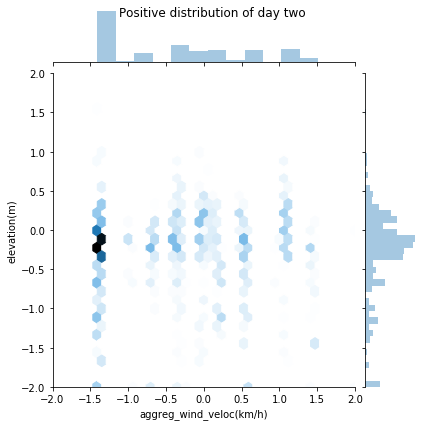

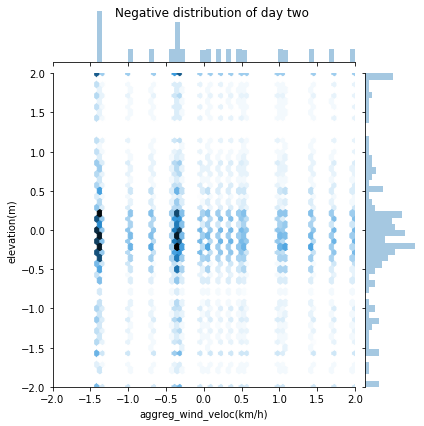

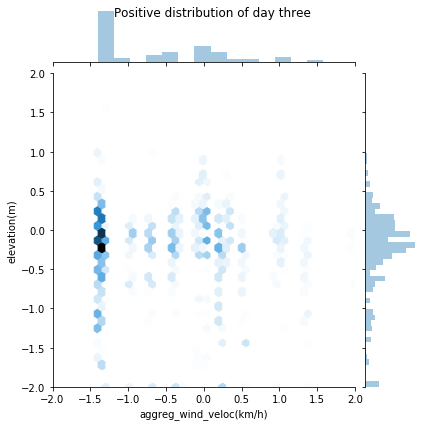

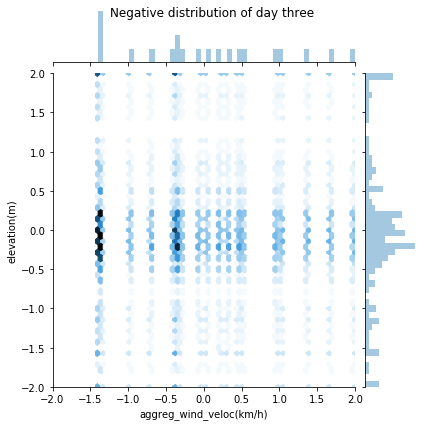

In [284]:
#################################### Day two ###############################
fire_two_df = train_two_feat[bool2_train_labels]
not_fire_two_df = train_two_feat[~bool2_train_labels]

sns.jointplot(fire_two_df["aggreg_wind_veloc(km/h)"], fire_two_df["elevation(m)"],
              kind='hex', xlim = (-2,2), ylim = (-2,2))
plt.suptitle("Positive distribution of day two")

sns.jointplot(not_fire_two_df["aggreg_wind_veloc(km/h)"], not_fire_two_df["elevation(m)"],
              kind='hex', xlim = (-2,2), ylim = (-2,2))
_ = plt.suptitle("Negative distribution of day two")

##################################### Day three ###########################
fire_three_df = train_three_feat[bool3_train_labels]
not_fire_three_df = train_three_feat[~bool3_train_labels]

sns.jointplot(fire_three_df["aggreg_wind_veloc(km/h)"], fire_three_df["elevation(m)"],
              kind='hex', xlim = (-2,2), ylim = (-2,2))
plt.suptitle("Positive distribution of day three")

sns.jointplot(not_fire_three_df["aggreg_wind_veloc(km/h)"], not_fire_three_df["elevation(m)"],
              kind='hex', xlim = (-2,2), ylim = (-2,2))
_ = plt.suptitle("Negative distribution of day three")

### We can use other variables to visualize their distribution

## Define the model and metrics

Define a function that creates a simple neural network with a densly connected hidden layer, a [dropout](https://developers.google.com/machine-learning/glossary/#dropout_regularization) layer to reduce overfitting, and an output sigmoid layer that returns the probability of a transaction being fraudulent:

In [285]:
METRICS = [
      keras.metrics.TruePositives(name = "TP"),
      keras.metrics.FalsePositives(name = "FP"),
      keras.metrics.TrueNegatives(name = "TN"),
      keras.metrics.FalseNegatives(name = "FN"), 
      keras.metrics.BinaryAccuracy(name = "accuracy"),
      keras.metrics.Precision(name = "precision"),
      keras.metrics.Recall(name = "recall"),
      keras.metrics.AUC(name = "auc"),
]

def make_model2(metrics_two = METRICS, output_bias = None):
    if output_bias is not None:
        output_bias = keras.initializers.Constant(output_bias)
    model_two = keras.Sequential([
        keras.layers.Dense(32, activation = "relu", input_shape = (train_two_feat.shape[-1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation = "relu"),
        keras.layers.Dense(1, activation = "sigmoid", bias_initializer = output_bias),
    ])

    model_two.compile(
        optimizer = keras.optimizers.Adam(lr = 1e-3),
        loss = keras.losses.BinaryCrossentropy(),
        metrics = metrics_two)

    return model_two

def make_model3(metrics_three = METRICS, output_bias = None):
    if output_bias is not None:
        output_bias = keras.initializers.Constant(output_bias)
    model_three = keras.Sequential([
        keras.layers.Dense(32, activation = "relu", input_shape = (train_three_feat.shape[-1],)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation = "relu"),
        keras.layers.Dense(1, activation = "sigmoid", bias_initializer = output_bias),
    ])

    model_three.compile(
        optimizer = keras.optimizers.Adam(lr = 1e-3),
        loss = keras.losses.BinaryCrossentropy(),
        metrics = metrics_three)

    return model_three

## Baseline model
### Build the model
Now create and train your model using the function that was defined earlier. Notice that the model is fit using a larger than default batch size of 3850, this is important to ensure that each batch has a decent chance of containing a few positive samples. If the batch size was too small, they would likely have no fraudulent transactions to learn from.

Note: this model will not handle the class imbalance well. You will improve it later in this tutorial.

In [326]:
EPOCHS = 250
BATCH_SIZE = 7700

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = "val_auc", 
    verbose = 1,
    patience = 20,
    mode= "max",
    restore_best_weights = True)

model_two = make_model2()
print("Sumary of day two :", model_two.summary())

model_three = make_model3()
print("\nSumary of day three :", model_three.summary())

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 32)                448       
_________________________________________________________________
dropout_22 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_67 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________
Sumary of day two : None
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 32)                448       
_______

In [327]:
# Test run the model :
model_two.predict(train_two_feat[:10])
#model_three.predict(train_three_feat[:10])

array([[0.8601639 ],
       [0.86017615],
       [0.86017615],
       [0.86018836],
       [0.86018836],
       [0.86017615],
       [0.86017615],
       [0.86018836],
       [0.8601884 ],
       [0.86020064]], dtype=float32)

These are initial guesses are not great. You know the dataset is imbalanced. Set the output layer's bias to reflect that (See: [A Recipe for Training Neural Networks: "init well"](http://karpathy.github.io/2019/04/25/recipe/#2-set-up-the-end-to-end-trainingevaluation-skeleton--get-dumb-baselines)). This can help with initial convergence.

With the default bias initialization the loss should be about `math.log(2) = 0.69314`

In [328]:
#results_two = model_two.evaluate(train_two_feat, train_two_labels, batch_size = BATCH_SIZE, verbose=0)
#print("Loss: {:0.4f}".format(results_two[0]))

In [329]:
second_results = model_three.evaluate(train_three_feat, train_three_labels, batch_size = BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(second_results[0]))

Loss: 0.4470


In [330]:
initial_bias = np.log([fire_three/not_fire_three])
initial_bias

array([-3.78551869])

Set that as the initial bias, and the model will give much more reasonable initial guesses. 

It should be near: `fire_three/total_three = 0.0221933`

In [331]:
model_three = make_model3(output_bias = initial_bias)
model_three.predict(train_three_feat[:10])

array([[0.04153121],
       [0.04151982],
       [0.04151982],
       [0.04150844],
       [0.04150844],
       [0.04151982],
       [0.04151982],
       [0.04150844],
       [0.04150844],
       [0.04149706]], dtype=float32)

With this initialization the initial loss should be approximately:

$$-p_0log(p_0)-(1-p_0)log(1-p_0) = 0.01317$$

In [332]:
second_results = model_three.evaluate(train_three_feat, train_three_labels, batch_size = BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(second_results[0]))

Loss: 0.1257


Cette perte initiale est nettement inférieure à ce qu'elle aurait été avec une initialisation naïve.

De cette façon, le modèle n'a pas besoin de passer les premières époques à apprendre que des exemples positifs sont peu probables. Cela facilite également la lecture des graphiques de la perte pendant l'entraînement.

### Checkpoint the initial weights

To make the various training runs more comparable, keep this initial model's weights in a checkpoint file, and load them into each model before training.

In [333]:
initial_weights = os.path.join(tempfile.mkdtemp(), "initial_weights")
model_three.save_weights(initial_weights)

### Confirm that the bias fix helps

Before moving on, confirm quick that the careful bias initialization actually helped.

Train the model for 20 epochs, with and without this careful initialization, and compare the losses: 

In [334]:
model_three = make_model3()
model_three.load_weights(initial_weights)
model_three.layers[-1].bias.assign([0.0])
zero_bias_history = model_three.fit(
    train_three_feat,
    train_three_labels,
    batch_size = BATCH_SIZE,
    epochs = 20,
    validation_data = (val_three_feat, val3_labels), 
    verbose = 0)

In [335]:
model_three = make_model3()
model_three.load_weights(initial_weights)
careful_bias_history = model_three.fit(
    train_three_feat,
    train_three_labels,
    batch_size = BATCH_SIZE,
    epochs = 20,
    validation_data = (val_three_feat, val3_labels), 
    verbose=0)

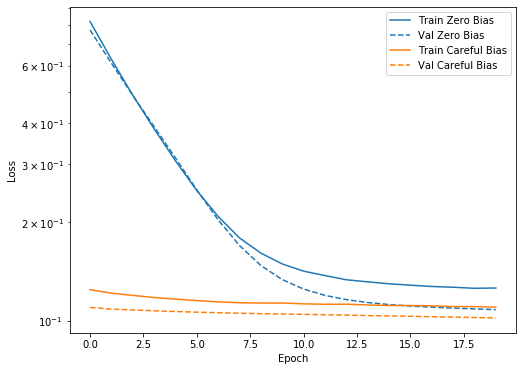

In [336]:
def plot_loss(history, label, n):
    # Use a log scale to show the wide range of values.
    plt.semilogy(history.epoch,  history.history['loss'],
                 color = colors[n], label = 'Train '+label)
    plt.semilogy(history.epoch,  history.history['val_loss'],
                 color = colors[n], label = 'Val '+label,
                 linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
  
    plt.legend()
    
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [337]:
model_three = make_model3()
model_three.load_weights(initial_weights)
baseline_history = model_three.fit(
    train_three_feat,
    train_three_labels,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = [early_stopping],
    validation_data = (val_three_feat, val3_labels))

Train on 80850 samples, validate on 15400 samples
Epoch 1/250
80850/80850 [==============================] - 2s 20us/sample - loss: 0.1244 - TP: 0.0000e+00 - FP: 0.0000e+00 - TN: 78637.0000 - FN: 2213.0000 - accuracy: 0.9726 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5970 - val_loss: 0.1098 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5891
Epoch 2/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.1212 - TP: 0.0000e+00 - FP: 0.0000e+00 - TN: 78637.0000 - FN: 2213.0000 - accuracy: 0.9726 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6681 - val_loss: 0.1085 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6225
Epoch 3/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.1194 - TP:

Epoch 20/250
80850/80850 [==============================] - 0s 5us/sample - loss: 0.1100 - TP: 0.0000e+00 - FP: 0.0000e+00 - TN: 78637.0000 - FN: 2213.0000 - accuracy: 0.9726 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7925 - val_loss: 0.1020 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7468
Epoch 21/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.1098 - TP: 0.0000e+00 - FP: 0.0000e+00 - TN: 78637.0000 - FN: 2213.0000 - accuracy: 0.9726 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7934 - val_loss: 0.1017 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7541
Epoch 22/250
80850/80850 [==============================] - 0s 5us/sample - loss: 0.1094 - TP: 0.0000e+00 - FP: 0.0000e+00 - TN: 78637.0000 - 

80850/80850 [==============================] - 0s 6us/sample - loss: 0.1066 - TP: 0.0000e+00 - FP: 0.0000e+00 - TN: 78637.0000 - FN: 2213.0000 - accuracy: 0.9726 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.8158 - val_loss: 0.0957 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8090
Epoch 40/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.1060 - TP: 0.0000e+00 - FP: 0.0000e+00 - TN: 78637.0000 - FN: 2213.0000 - accuracy: 0.9726 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.8200 - val_loss: 0.0954 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8111
Epoch 41/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.1059 - TP: 0.0000e+00 - FP: 0.0000e+00 - TN: 78637.0000 - FN: 2213.0000

80850/80850 [==============================] - 0s 5us/sample - loss: 0.1041 - TP: 0.0000e+00 - FP: 1.0000 - TN: 78636.0000 - FN: 2213.0000 - accuracy: 0.9726 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.8317 - val_loss: 0.0920 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8407
Epoch 59/250
80850/80850 [==============================] - 0s 5us/sample - loss: 0.1044 - TP: 0.0000e+00 - FP: 0.0000e+00 - TN: 78637.0000 - FN: 2213.0000 - accuracy: 0.9726 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.8288 - val_loss: 0.0917 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8402
Epoch 60/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.1043 - TP: 1.0000 - FP: 0.0000e+00 - TN: 78637.0000 - FN: 2212.0000 - accur

Epoch 78/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.1030 - TP: 8.0000 - FP: 5.0000 - TN: 78632.0000 - FN: 2205.0000 - accuracy: 0.9727 - precision: 0.6154 - recall: 0.0036 - auc: 0.8379 - val_loss: 0.0891 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8562
Epoch 79/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.1025 - TP: 1.0000 - FP: 2.0000 - TN: 78635.0000 - FN: 2212.0000 - accuracy: 0.9726 - precision: 0.3333 - recall: 4.5188e-04 - auc: 0.8421 - val_loss: 0.0890 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8596
Epoch 80/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.1027 - TP: 1.0000 - FP: 2.0000 - TN: 78635.0000 - FN: 2212.0000 - accuracy: 0.9726 - p

80850/80850 [==============================] - 0s 5us/sample - loss: 0.1014 - TP: 5.0000 - FP: 7.0000 - TN: 78630.0000 - FN: 2208.0000 - accuracy: 0.9726 - precision: 0.4167 - recall: 0.0023 - auc: 0.8489 - val_loss: 0.0872 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8668
Epoch 98/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.1012 - TP: 7.0000 - FP: 5.0000 - TN: 78632.0000 - FN: 2206.0000 - accuracy: 0.9727 - precision: 0.5833 - recall: 0.0032 - auc: 0.8485 - val_loss: 0.0870 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8673
Epoch 99/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.1013 - TP: 4.0000 - FP: 6.0000 - TN: 78631.0000 - FN: 2209.0000 - accuracy: 0.9726 - precision: 0.4000 

Epoch 117/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.1005 - TP: 5.0000 - FP: 5.0000 - TN: 78632.0000 - FN: 2208.0000 - accuracy: 0.9726 - precision: 0.5000 - recall: 0.0023 - auc: 0.8524 - val_loss: 0.0857 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8717
Epoch 118/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.1004 - TP: 7.0000 - FP: 7.0000 - TN: 78630.0000 - FN: 2206.0000 - accuracy: 0.9726 - precision: 0.5000 - recall: 0.0032 - auc: 0.8539 - val_loss: 0.0857 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8737
Epoch 119/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.1005 - TP: 7.0000 - FP: 10.0000 - TN: 78627.0000 - FN: 2206.0000 - accuracy: 0.9726 - p

Epoch 137/250
80850/80850 [==============================] - 0s 5us/sample - loss: 0.0995 - TP: 5.0000 - FP: 7.0000 - TN: 78630.0000 - FN: 2208.0000 - accuracy: 0.9726 - precision: 0.4167 - recall: 0.0023 - auc: 0.8586 - val_loss: 0.0845 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8799
Epoch 138/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.0993 - TP: 4.0000 - FP: 16.0000 - TN: 78621.0000 - FN: 2209.0000 - accuracy: 0.9725 - precision: 0.2000 - recall: 0.0018 - auc: 0.8598 - val_loss: 0.0845 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8803
Epoch 139/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.0992 - TP: 6.0000 - FP: 10.0000 - TN: 78627.0000 - FN: 2207.0000 - accuracy: 0.9726 - 

Epoch 157/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.0986 - TP: 13.0000 - FP: 10.0000 - TN: 78627.0000 - FN: 2200.0000 - accuracy: 0.9727 - precision: 0.5652 - recall: 0.0059 - auc: 0.8635 - val_loss: 0.0837 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8811
Epoch 158/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.0984 - TP: 12.0000 - FP: 19.0000 - TN: 78618.0000 - FN: 2201.0000 - accuracy: 0.9725 - precision: 0.3871 - recall: 0.0054 - auc: 0.8647 - val_loss: 0.0836 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8811
Epoch 159/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.0986 - TP: 11.0000 - FP: 18.0000 - TN: 78619.0000 - FN: 2202.0000 - accuracy: 0.972

Epoch 177/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.0978 - TP: 17.0000 - FP: 18.0000 - TN: 78619.0000 - FN: 2196.0000 - accuracy: 0.9726 - precision: 0.4857 - recall: 0.0077 - auc: 0.8674 - val_loss: 0.0831 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8851
Epoch 178/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.0980 - TP: 12.0000 - FP: 13.0000 - TN: 78624.0000 - FN: 2201.0000 - accuracy: 0.9726 - precision: 0.4800 - recall: 0.0054 - auc: 0.8658 - val_loss: 0.0830 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8848
Epoch 179/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.0982 - TP: 11.0000 - FP: 20.0000 - TN: 78617.0000 - FN: 2202.0000 - accuracy: 0.972

Epoch 197/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.0979 - TP: 8.0000 - FP: 16.0000 - TN: 78621.0000 - FN: 2205.0000 - accuracy: 0.9725 - precision: 0.3333 - recall: 0.0036 - auc: 0.8673 - val_loss: 0.0827 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8869
Epoch 198/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.0977 - TP: 7.0000 - FP: 17.0000 - TN: 78620.0000 - FN: 2206.0000 - accuracy: 0.9725 - precision: 0.2917 - recall: 0.0032 - auc: 0.8682 - val_loss: 0.0827 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8862
Epoch 199/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.0979 - TP: 12.0000 - FP: 11.0000 - TN: 78626.0000 - FN: 2201.0000 - accuracy: 0.9726 

Epoch 217/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.0972 - TP: 10.0000 - FP: 9.0000 - TN: 78628.0000 - FN: 2203.0000 - accuracy: 0.9726 - precision: 0.5263 - recall: 0.0045 - auc: 0.8705 - val_loss: 0.0824 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8884
Epoch 218/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.0974 - TP: 9.0000 - FP: 14.0000 - TN: 78623.0000 - FN: 2204.0000 - accuracy: 0.9726 - precision: 0.3913 - recall: 0.0041 - auc: 0.8690 - val_loss: 0.0823 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8874
Epoch 219/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.0977 - TP: 12.0000 - FP: 18.0000 - TN: 78619.0000 - FN: 2201.0000 - accuracy: 0.9726 

Epoch 237/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.0972 - TP: 11.0000 - FP: 14.0000 - TN: 78623.0000 - FN: 2202.0000 - accuracy: 0.9726 - precision: 0.4400 - recall: 0.0050 - auc: 0.8695 - val_loss: 0.0819 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8906
Epoch 238/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.0971 - TP: 17.0000 - FP: 14.0000 - TN: 78623.0000 - FN: 2196.0000 - accuracy: 0.9727 - precision: 0.5484 - recall: 0.0077 - auc: 0.8701 - val_loss: 0.0818 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8896
Epoch 239/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.0970 - TP: 10.0000 - FP: 15.0000 - TN: 78622.0000 - FN: 2203.0000 - accuracy: 0.972

### Check training history
In this section, you will produce plots of your model's accuracy and loss on the training and validation set. These are useful to check for overfitting, which you can learn more about in this [tutorial](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit).

Additionally, you can produce these plots for any of the metrics you created above. False negatives are included as an example.

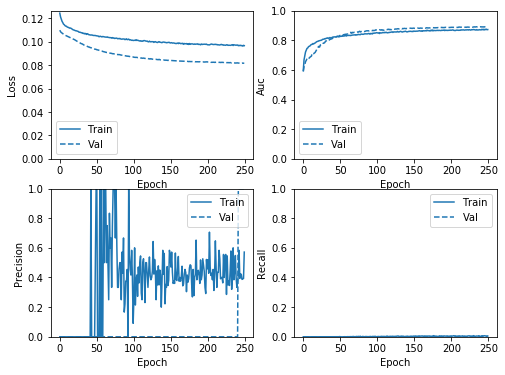

In [338]:
def plot_metrics(history):
    metrics =  ["loss", "auc", "precision", "recall"]
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch,  history.history[metric], color = colors[0], label = 'Train')
        plt.plot(history.epoch, history.history['val_' + metric],
                 color = colors[0], linestyle = "--", label = 'Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0,1])
        else:
            plt.ylim([0,1])

        plt.legend()
    
plot_metrics(baseline_history)

### Evaluate metrics

You can use a [confusion matrix](https://developers.google.com/machine-learning/glossary/#confusion_matrix) to summarize the actual vs. predicted labels where the X axis is the predicted label and the Y axis is the actual label.

In [339]:
train_predictions_baseline = model_three.predict(train_three_feat, batch_size = BATCH_SIZE)
test_predictions_baseline = model_three.predict(test_three_feat, batch_size = BATCH_SIZE)

In [340]:
def plot_cm(labels, predictions, p = 0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize = (6,5))
    sns.heatmap(cm, annot = True, fmt = "d")
    plt.title("Confusion matrix @{:.2f}".format(p))
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")

    print("True Negatives: ", cm[0][0])
    print("False Positives: ", cm[0][1])
    print("False Negatives: ", cm[1][0])
    print("True Positives: ", cm[1][1])
    print("Total Fire cells: ", np.sum(cm[1]))

loss :  0.033457073072592415
TP :  0.0
FP :  9.0
TN :  22997.0
FN :  94.0
accuracy :  0.99554116
precision :  0.0
recall :  0.0
auc :  0.65341485

True Negatives:  22997
False Positives:  9
False Negatives:  94
True Positives:  0
Total Fire cells:  94


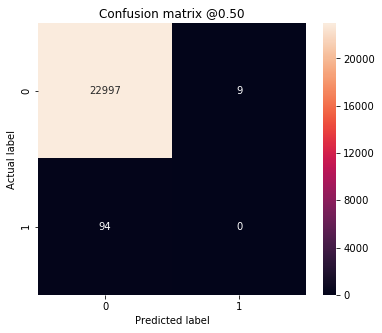

In [341]:
baseline_results = model_three.evaluate(test_three_feat, test_three_labels,
                                  batch_size = BATCH_SIZE, verbose = 0)
for name, value in zip(model_three.metrics_names, baseline_results):
    print(name, ': ', value)
print()

plot_cm(test_three_labels, test_predictions_baseline)

### Plot the ROC

Now plot the [ROC](https://developers.google.com/machine-learning/glossary#ROC). This plot is useful because it shows, at a glance, the range of performance the model can reach just by tuning the output threshold.

In [342]:
def plot_roc(name, labels, predictions, **kwargs):
    FP, TP, _ = sklearn.metrics.roc_curve(labels, predictions)

    plt.plot(100*FP, 100*TP, label = name, linewidth = 2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,90])
    plt.ylim([0,105])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

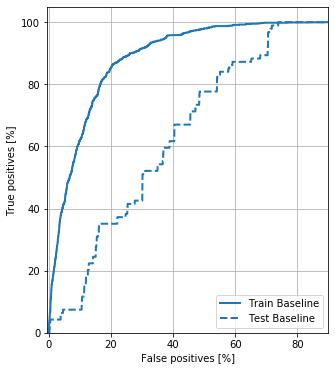

In [343]:
plot_roc("Train Baseline", train_three_labels, train_predictions_baseline, color = colors[0])
plot_roc("Test Baseline", test_three_labels, test_predictions_baseline, color = colors[0], linestyle='--')
plt.legend(loc = 'lower right');

### Les prédictions sur nos données de test sont très mauvaises et l'auc est très proche du hazard

## Class weights
### Calculate class weights

The goal is to identify fradulent transactions, but you don't have very many of those positive samples to work with, so you would want to have the classifier heavily weight the few examples that are available. You can do this by passing Keras weights for each class through a parameter. These will cause the model to "pay more attention" to examples from an under-represented class.

In [344]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / not_fire_three)*(total_three)/2.0 
weight_for_1 = (1 / fire_three)*(total_three)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.51
Weight for class 1: 22.53


### Train a model with class weights

Now try re-training and evaluating the model with class weights to see how that affects the predictions.

Note: Using `class_weights` changes the range of the loss. This may affect the stability of the training depending on the optimizer. Optimizers whose step size is dependent on the magnitude of the gradient, like `optimizers.SGD`, may fail. The optimizer used here, `optimizers.Adam`, is unaffected by the scaling change. Also note that because of the weighting, the total losses are not comparable between the two models.

In [345]:
weighted_model = make_model3()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_three_feat,
    train_three_labels,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = [early_stopping],
    validation_data = (val_three_feat, val3_labels),
    # The class weights go here
    class_weight = class_weight) 

Train on 80850 samples, validate on 15400 samples
Epoch 1/250
80850/80850 [==============================] - 1s 17us/sample - loss: 1.9763 - TP: 0.0000e+00 - FP: 0.0000e+00 - TN: 78637.0000 - FN: 2213.0000 - accuracy: 0.9726 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5629 - val_loss: 0.1217 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5499
Epoch 2/250
80850/80850 [==============================] - 0s 6us/sample - loss: 1.7228 - TP: 0.0000e+00 - FP: 0.0000e+00 - TN: 78637.0000 - FN: 2213.0000 - accuracy: 0.9726 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5682 - val_loss: 0.1383 - val_TP: 0.0000e+00 - val_FP: 0.0000e+00 - val_TN: 15042.0000 - val_FN: 358.0000 - val_accuracy: 0.9768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5625
Epoch 3/250
80850/80850 [==============================] - 0s 6us/sample - loss: 1.4599 - TP:

Epoch 21/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.6449 - TP: 1695.0000 - FP: 28580.0000 - TN: 50057.0000 - FN: 518.0000 - accuracy: 0.6401 - precision: 0.0560 - recall: 0.7659 - auc: 0.7623 - val_loss: 0.5987 - val_TP: 208.0000 - val_FP: 5210.0000 - val_TN: 9832.0000 - val_FN: 150.0000 - val_accuracy: 0.6519 - val_precision: 0.0384 - val_recall: 0.5810 - val_auc: 0.6672
Epoch 22/250
80850/80850 [==============================] - 1s 6us/sample - loss: 0.6453 - TP: 1683.0000 - FP: 28503.0000 - TN: 50134.0000 - FN: 530.0000 - accuracy: 0.6409 - precision: 0.0558 - recall: 0.7605 - auc: 0.7627 - val_loss: 0.5951 - val_TP: 216.0000 - val_FP: 5299.0000 - val_TN: 9743.0000 - val_FN: 142.0000 - val_accuracy: 0.6467 - val_precision: 0.0392 - val_recall: 0.6034 - val_auc: 0.6716
Epoch 23/250
80850/80850 [==============================] - 1s 7us/sample - loss: 0.6480 - TP: 1690.0000 - FP: 28427.0000 - TN: 50210.0000 - FN: 523.0000 - accuracy: 0.6419 - precision: 

80850/80850 [==============================] - 1s 7us/sample - loss: 0.6109 - TP: 1768.0000 - FP: 28051.0000 - TN: 50586.0000 - FN: 445.0000 - accuracy: 0.6475 - precision: 0.0593 - recall: 0.7989 - auc: 0.7854 - val_loss: 0.5316 - val_TP: 257.0000 - val_FP: 4934.0000 - val_TN: 10108.0000 - val_FN: 101.0000 - val_accuracy: 0.6731 - val_precision: 0.0495 - val_recall: 0.7179 - val_auc: 0.7391
Epoch 42/250
80850/80850 [==============================] - 1s 8us/sample - loss: 0.6017 - TP: 1773.0000 - FP: 27790.0000 - TN: 50847.0000 - FN: 440.0000 - accuracy: 0.6508 - precision: 0.0600 - recall: 0.8012 - auc: 0.7916 - val_loss: 0.5344 - val_TP: 263.0000 - val_FP: 4960.0000 - val_TN: 10082.0000 - val_FN: 95.0000 - val_accuracy: 0.6718 - val_precision: 0.0504 - val_recall: 0.7346 - val_auc: 0.7415
Epoch 43/250
80850/80850 [==============================] - 0s 6us/sample - loss: 0.6078 - TP: 1766.0000 - FP: 27772.0000 - TN: 50865.0000 - FN: 447.0000 - accuracy: 0.6510 - precision: 0.0598 - rec

80850/80850 [==============================] - 1s 6us/sample - loss: 0.5925 - TP: 1804.0000 - FP: 27576.0000 - TN: 51061.0000 - FN: 409.0000 - accuracy: 0.6539 - precision: 0.0614 - recall: 0.8152 - auc: 0.7978 - val_loss: 0.5172 - val_TP: 271.0000 - val_FP: 4933.0000 - val_TN: 10109.0000 - val_FN: 87.0000 - val_accuracy: 0.6740 - val_precision: 0.0521 - val_recall: 0.7570 - val_auc: 0.7806
Epoch 62/250
80850/80850 [==============================] - 1s 6us/sample - loss: 0.5902 - TP: 1802.0000 - FP: 27320.0000 - TN: 51317.0000 - FN: 411.0000 - accuracy: 0.6570 - precision: 0.0619 - recall: 0.8143 - auc: 0.7988 - val_loss: 0.5119 - val_TP: 271.0000 - val_FP: 4931.0000 - val_TN: 10111.0000 - val_FN: 87.0000 - val_accuracy: 0.6742 - val_precision: 0.0521 - val_recall: 0.7570 - val_auc: 0.7833
Epoch 63/250
80850/80850 [==============================] - 1s 6us/sample - loss: 0.5929 - TP: 1816.0000 - FP: 28413.0000 - TN: 50224.0000 - FN: 397.0000 - accuracy: 0.6437 - precision: 0.0601 - reca

80850/80850 [==============================] - 1s 6us/sample - loss: 0.5757 - TP: 1820.0000 - FP: 27195.0000 - TN: 51442.0000 - FN: 393.0000 - accuracy: 0.6588 - precision: 0.0627 - recall: 0.8224 - auc: 0.8078 - val_loss: 0.4952 - val_TP: 274.0000 - val_FP: 4892.0000 - val_TN: 10150.0000 - val_FN: 84.0000 - val_accuracy: 0.6769 - val_precision: 0.0530 - val_recall: 0.7654 - val_auc: 0.8113
Epoch 82/250
80850/80850 [==============================] - 1s 6us/sample - loss: 0.5703 - TP: 1838.0000 - FP: 27093.0000 - TN: 51544.0000 - FN: 375.0000 - accuracy: 0.6603 - precision: 0.0635 - recall: 0.8305 - auc: 0.8115 - val_loss: 0.5017 - val_TP: 275.0000 - val_FP: 4928.0000 - val_TN: 10114.0000 - val_FN: 83.0000 - val_accuracy: 0.6746 - val_precision: 0.0529 - val_recall: 0.7682 - val_auc: 0.8118
Epoch 83/250
80850/80850 [==============================] - 1s 7us/sample - loss: 0.5715 - TP: 1843.0000 - FP: 27252.0000 - TN: 51385.0000 - FN: 370.0000 - accuracy: 0.6584 - precision: 0.0633 - reca

80850/80850 [==============================] - 1s 6us/sample - loss: 0.5597 - TP: 1861.0000 - FP: 27108.0000 - TN: 51529.0000 - FN: 352.0000 - accuracy: 0.6604 - precision: 0.0642 - recall: 0.8409 - auc: 0.8183 - val_loss: 0.4897 - val_TP: 292.0000 - val_FP: 4990.0000 - val_TN: 10052.0000 - val_FN: 66.0000 - val_accuracy: 0.6717 - val_precision: 0.0553 - val_recall: 0.8156 - val_auc: 0.8319
Epoch 102/250
80850/80850 [==============================] - 1s 6us/sample - loss: 0.5584 - TP: 1856.0000 - FP: 26552.0000 - TN: 52085.0000 - FN: 357.0000 - accuracy: 0.6672 - precision: 0.0653 - recall: 0.8387 - auc: 0.8193 - val_loss: 0.5088 - val_TP: 300.0000 - val_FP: 5062.0000 - val_TN: 9980.0000 - val_FN: 58.0000 - val_accuracy: 0.6675 - val_precision: 0.0559 - val_recall: 0.8380 - val_auc: 0.8315
Epoch 103/250
80850/80850 [==============================] - 1s 6us/sample - loss: 0.5646 - TP: 1860.0000 - FP: 27360.0000 - TN: 51277.0000 - FN: 353.0000 - accuracy: 0.6572 - precision: 0.0637 - rec

80850/80850 [==============================] - 1s 6us/sample - loss: 0.5497 - TP: 1909.0000 - FP: 27253.0000 - TN: 51384.0000 - FN: 304.0000 - accuracy: 0.6592 - precision: 0.0655 - recall: 0.8626 - auc: 0.8247 - val_loss: 0.5159 - val_TP: 312.0000 - val_FP: 5067.0000 - val_TN: 9975.0000 - val_FN: 46.0000 - val_accuracy: 0.6680 - val_precision: 0.0580 - val_recall: 0.8715 - val_auc: 0.8445
Epoch 122/250
80850/80850 [==============================] - 1s 6us/sample - loss: 0.5540 - TP: 1868.0000 - FP: 26769.0000 - TN: 51868.0000 - FN: 345.0000 - accuracy: 0.6646 - precision: 0.0652 - recall: 0.8441 - auc: 0.8215 - val_loss: 0.4908 - val_TP: 311.0000 - val_FP: 4968.0000 - val_TN: 10074.0000 - val_FN: 47.0000 - val_accuracy: 0.6744 - val_precision: 0.0589 - val_recall: 0.8687 - val_auc: 0.8456
Epoch 123/250
80850/80850 [==============================] - 1s 6us/sample - loss: 0.5492 - TP: 1867.0000 - FP: 26572.0000 - TN: 52065.0000 - FN: 346.0000 - accuracy: 0.6671 - precision: 0.0656 - rec

80850/80850 [==============================] - 1s 6us/sample - loss: 0.5420 - TP: 1899.0000 - FP: 26312.0000 - TN: 52325.0000 - FN: 314.0000 - accuracy: 0.6707 - precision: 0.0673 - recall: 0.8581 - auc: 0.8299 - val_loss: 0.4900 - val_TP: 309.0000 - val_FP: 4832.0000 - val_TN: 10210.0000 - val_FN: 49.0000 - val_accuracy: 0.6831 - val_precision: 0.0601 - val_recall: 0.8631 - val_auc: 0.8532
Epoch 142/250
80850/80850 [==============================] - 1s 6us/sample - loss: 0.5426 - TP: 1884.0000 - FP: 26399.0000 - TN: 52238.0000 - FN: 329.0000 - accuracy: 0.6694 - precision: 0.0666 - recall: 0.8513 - auc: 0.8301 - val_loss: 0.5291 - val_TP: 309.0000 - val_FP: 5010.0000 - val_TN: 10032.0000 - val_FN: 49.0000 - val_accuracy: 0.6715 - val_precision: 0.0581 - val_recall: 0.8631 - val_auc: 0.8536
Epoch 143/250
80850/80850 [==============================] - 1s 6us/sample - loss: 0.5390 - TP: 1919.0000 - FP: 26835.0000 - TN: 51802.0000 - FN: 294.0000 - accuracy: 0.6645 - precision: 0.0667 - re

80850/80850 [==============================] - 1s 6us/sample - loss: 0.5312 - TP: 1947.0000 - FP: 26994.0000 - TN: 51643.0000 - FN: 266.0000 - accuracy: 0.6628 - precision: 0.0673 - recall: 0.8798 - auc: 0.8371 - val_loss: 0.5061 - val_TP: 315.0000 - val_FP: 4933.0000 - val_TN: 10109.0000 - val_FN: 43.0000 - val_accuracy: 0.6769 - val_precision: 0.0600 - val_recall: 0.8799 - val_auc: 0.8611
Epoch 162/250
80850/80850 [==============================] - 1s 6us/sample - loss: 0.5336 - TP: 1905.0000 - FP: 26060.0000 - TN: 52577.0000 - FN: 308.0000 - accuracy: 0.6739 - precision: 0.0681 - recall: 0.8608 - auc: 0.8356 - val_loss: 0.5020 - val_TP: 315.0000 - val_FP: 4908.0000 - val_TN: 10134.0000 - val_FN: 43.0000 - val_accuracy: 0.6785 - val_precision: 0.0603 - val_recall: 0.8799 - val_auc: 0.8613
Epoch 163/250
80850/80850 [==============================] - 1s 6us/sample - loss: 0.5341 - TP: 1932.0000 - FP: 26689.0000 - TN: 51948.0000 - FN: 281.0000 - accuracy: 0.6664 - precision: 0.0675 - re

80850/80850 [==============================] - 1s 6us/sample - loss: 0.5301 - TP: 1941.0000 - FP: 26802.0000 - TN: 51835.0000 - FN: 272.0000 - accuracy: 0.6651 - precision: 0.0675 - recall: 0.8771 - auc: 0.8378 - val_loss: 0.5197 - val_TP: 322.0000 - val_FP: 5080.0000 - val_TN: 9962.0000 - val_FN: 36.0000 - val_accuracy: 0.6678 - val_precision: 0.0596 - val_recall: 0.8994 - val_auc: 0.8653
Epoch 182/250
80850/80850 [==============================] - 1s 6us/sample - loss: 0.5326 - TP: 1927.0000 - FP: 26132.0000 - TN: 52505.0000 - FN: 286.0000 - accuracy: 0.6732 - precision: 0.0687 - recall: 0.8708 - auc: 0.8359 - val_loss: 0.4915 - val_TP: 305.0000 - val_FP: 4686.0000 - val_TN: 10356.0000 - val_FN: 53.0000 - val_accuracy: 0.6923 - val_precision: 0.0611 - val_recall: 0.8520 - val_auc: 0.8647
Epoch 183/250
80850/80850 [==============================] - 1s 6us/sample - loss: 0.5270 - TP: 1964.0000 - FP: 26859.0000 - TN: 51778.0000 - FN: 249.0000 - accuracy: 0.6647 - precision: 0.0681 - rec

80850/80850 [==============================] - 0s 6us/sample - loss: 0.5251 - TP: 1938.0000 - FP: 26034.0000 - TN: 52603.0000 - FN: 275.0000 - accuracy: 0.6746 - precision: 0.0693 - recall: 0.8757 - auc: 0.8416 - val_loss: 0.5274 - val_TP: 320.0000 - val_FP: 5038.0000 - val_TN: 10004.0000 - val_FN: 38.0000 - val_accuracy: 0.6704 - val_precision: 0.0597 - val_recall: 0.8939 - val_auc: 0.8680
Epoch 202/250
80850/80850 [==============================] - 1s 7us/sample - loss: 0.5259 - TP: 1924.0000 - FP: 26454.0000 - TN: 52183.0000 - FN: 289.0000 - accuracy: 0.6692 - precision: 0.0678 - recall: 0.8694 - auc: 0.8406 - val_loss: 0.5051 - val_TP: 318.0000 - val_FP: 4795.0000 - val_TN: 10247.0000 - val_FN: 40.0000 - val_accuracy: 0.6860 - val_precision: 0.0622 - val_recall: 0.8883 - val_auc: 0.8694
Epoch 203/250
80850/80850 [==============================] - 1s 6us/sample - loss: 0.5248 - TP: 1921.0000 - FP: 26515.0000 - TN: 52122.0000 - FN: 292.0000 - accuracy: 0.6684 - precision: 0.0676 - re

80850/80850 [==============================] - 1s 7us/sample - loss: 0.5232 - TP: 1931.0000 - FP: 25787.0000 - TN: 52850.0000 - FN: 282.0000 - accuracy: 0.6776 - precision: 0.0697 - recall: 0.8726 - auc: 0.8426 - val_loss: 0.5052 - val_TP: 317.0000 - val_FP: 4802.0000 - val_TN: 10240.0000 - val_FN: 41.0000 - val_accuracy: 0.6855 - val_precision: 0.0619 - val_recall: 0.8855 - val_auc: 0.8712
Epoch 222/250
80850/80850 [==============================] - 1s 6us/sample - loss: 0.5171 - TP: 1963.0000 - FP: 26261.0000 - TN: 52376.0000 - FN: 250.0000 - accuracy: 0.6721 - precision: 0.0696 - recall: 0.8870 - auc: 0.8463 - val_loss: 0.5096 - val_TP: 318.0000 - val_FP: 4833.0000 - val_TN: 10209.0000 - val_FN: 40.0000 - val_accuracy: 0.6836 - val_precision: 0.0617 - val_recall: 0.8883 - val_auc: 0.8711
Epoch 223/250
80850/80850 [==============================] - 1s 6us/sample - loss: 0.5214 - TP: 1955.0000 - FP: 26291.0000 - TN: 52346.0000 - FN: 258.0000 - accuracy: 0.6716 - precision: 0.0692 - re

80850/80850 [==============================] - 1s 6us/sample - loss: 0.5183 - TP: 1952.0000 - FP: 26012.0000 - TN: 52625.0000 - FN: 261.0000 - accuracy: 0.6750 - precision: 0.0698 - recall: 0.8821 - auc: 0.8455 - val_loss: 0.4820 - val_TP: 318.0000 - val_FP: 4491.0000 - val_TN: 10551.0000 - val_FN: 40.0000 - val_accuracy: 0.7058 - val_precision: 0.0661 - val_recall: 0.8883 - val_auc: 0.8735
Epoch 242/250
80850/80850 [==============================] - 1s 7us/sample - loss: 0.5126 - TP: 1965.0000 - FP: 25923.0000 - TN: 52714.0000 - FN: 248.0000 - accuracy: 0.6763 - precision: 0.0705 - recall: 0.8879 - auc: 0.8493 - val_loss: 0.5085 - val_TP: 331.0000 - val_FP: 4985.0000 - val_TN: 10057.0000 - val_FN: 27.0000 - val_accuracy: 0.6745 - val_precision: 0.0623 - val_recall: 0.9246 - val_auc: 0.8735
Epoch 243/250
80850/80850 [==============================] - 1s 6us/sample - loss: 0.5137 - TP: 1967.0000 - FP: 25962.0000 - TN: 52675.0000 - FN: 246.0000 - accuracy: 0.6758 - precision: 0.0704 - re

### Check training history

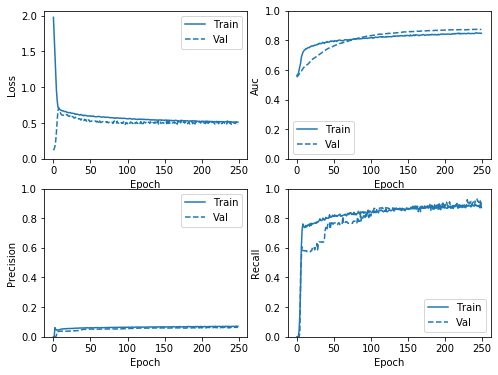

In [346]:
plot_metrics(weighted_history)

### Evaluate metrics

In [347]:
train_predict_weighted = weighted_model.predict(train_three_feat, batch_size = BATCH_SIZE)
test_predict_weighted = weighted_model.predict(test_three_feat, batch_size = BATCH_SIZE)

loss :  0.7368300557136536
TP :  62.0
FP :  11675.0
TN :  11331.0
FN :  32.0
accuracy :  0.49320346
precision :  0.00528244
recall :  0.65957445
auc :  0.6025646

True Negatives:  11331
False Positives:  11675
False Negatives:  32
True Positives:  62
Total Fire cells:  94


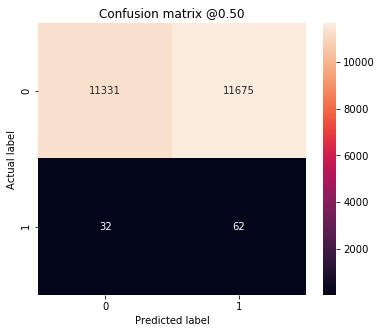

In [348]:
weighted_results = weighted_model.evaluate(test_three_feat, test_three_labels,
                                           batch_size = BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
    print(name, ': ', value)
print()

plot_cm(test_three_labels, test_predict_weighted)

### Plot the ROC

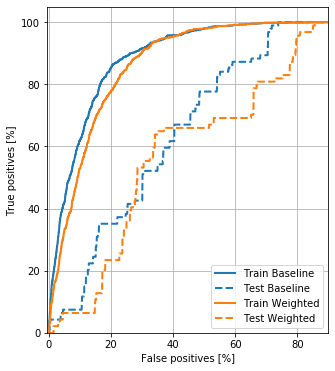

In [349]:
plot_roc("Train Baseline", train_three_labels, train_predictions_baseline, color = colors[0])
plot_roc("Test Baseline", test_three_labels, test_predictions_baseline, color = colors[0], linestyle = '--')

plot_roc("Train Weighted", train_three_labels, train_predict_weighted, color = colors[1])
plot_roc("Test Weighted", test_three_labels, test_predict_weighted, color = colors[1], linestyle = '--')

plt.legend(loc = "lower right");

### Les prédictions du jeu de test sont très mauvaises => sensiblement égales au hazard